<a href="https://colab.research.google.com/github/ShrimanthAM/DATA606Project/blob/main/DATA606_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# importing all the required libraries
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/MyDrive/DATA606/GoogleImages/data')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
from PIL import Image
import os

import warnings
warnings.filterwarnings('ignore')

import skimage.io as io
from skimage.transform import rotate
from skimage import img_as_ubyte
import cv2

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [42]:
img_folder = '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images' # original images path
augmented_img = '/content/gdrive/MyDrive/DATA606/GoogleImages/data/augmented_images' # path to store the augmented images

In [43]:
#load the path of each image in the folder to a list 
images=[]
for imgs in os.listdir(img_folder):
  images.append(os.path.join(img_folder,imgs))

print(images)

['/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/cdba407d3c.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/76589d3af1.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/5870a297d4.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/ddecbd5329.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/60c98f6dff.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/e2a78c9887.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/301cb27349.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/28d6faa8cb.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/5c88452ec9.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/5e6f125b02.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/c4ff44bda7.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/d75fcc23c2.jpg', '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/e7c6fe887c.jpg', '/content/gdrive/MyDrive

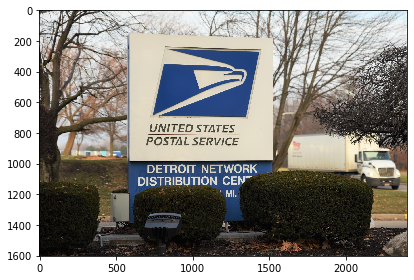

In [46]:
# Data augmentation on one image with results
original_image = io.imread('/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/cdba407d3c.jpg')
io.imshow(original_image)

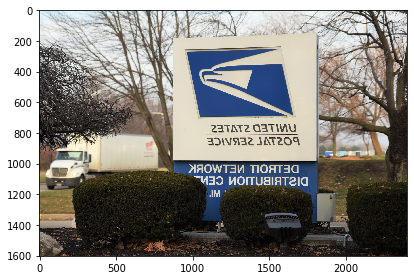

In [47]:
# left to right flip
hflip=np.fliplr(original_image)  
io.imshow(hflip)

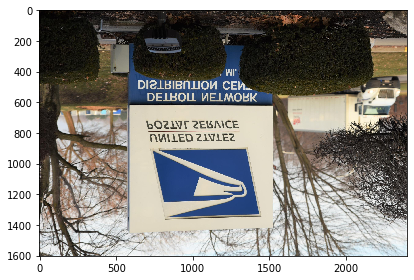

In [48]:
# up down flip 
vflip = np.flipud(original_image)
io.imshow(vflip)

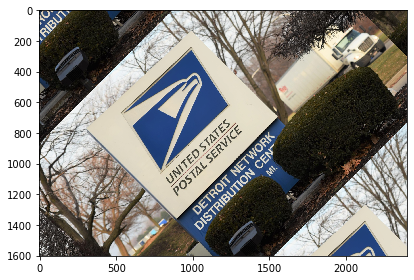

In [49]:
# rotating the image by 45 degrees
rotated = rotate(original_image, angle=45, mode = 'wrap')
io.imshow(rotated)

## Applying these transformations on all the images downloaded from Google(Original Images)

In [44]:
# left to right , up down and rotation by 45 degrees for each image in the directory path
for img in images:
  image = io.imread(img)
  last = img.split(
      '/').pop() # image name 

# left to right flip
  hflip=np.fliplr(image)
  new_image_path_h= augmented_img+'/'+'h_'+last
  trans_h_img = img_as_ubyte(hflip)  #Convert an image to unsigned byte format, with values in [0, 255].
  trans_h_img=cv2.cvtColor(trans_h_img, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
  cv2.imwrite(new_image_path_h, trans_h_img)

# up down flip  
  vflip = np.flipud(image)
  new_image_path_v= augmented_img+'/'+'v_'+last
  trans_v_img = img_as_ubyte(vflip)  #Convert an image to unsigned byte format, with values in [0, 255].
  trans_v_img=cv2.cvtColor(trans_v_img, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
  cv2.imwrite(new_image_path_v, trans_v_img)

# rotating the image by 45 degrees
  rotated = rotate(image, angle=45, mode = 'wrap')
  new_image_path_r= augmented_img+'/'+'r_'+last
  trans_r_img = img_as_ubyte(rotated)  #Convert an image to unsigned byte format, with values in [0, 255].
  trans_r_img=cv2.cvtColor(trans_r_img, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
  cv2.imwrite(new_image_path_r, trans_r_img)

#https://towardsdatascience.com/image-augmentation-using-python-numpy-opencv-and-skimage-ef027e9898da